<a href="https://colab.research.google.com/github/YashviP/Computer-Vision-Playlist/blob/main/Neural_networks_foundations_with_Tensorflow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow** is an open-source library developed by Google brain team for deep neural networks 


Features - 

1. Works with Python, C++, Java, R, and Go
2. Keras - Keras became the standard API for interacting with TensorFlow in 2.0
3. TensorFlow allows model deployment and ease of use in production
4. Support for eager computation 
5. good community support.

In [ ]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
# In tensorflow == 1.0
in_a = tf.placeholder(dtype=tf.float32, shape=(2))
def model(x):
  with tf.variable_scope("matmul"):
    W = tf.get_variable("W", initializer=tf.ones(shape=(2,2)))
    b = tf.get_variable("b", initializer=tf.zeros(shape=(2)))
    return W*x + b
out_a = model(in_a)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  outs = sess.run([out_a],
                feed_dict={in_a: [1, 0]})
  print(outs)

[array([[1., 0.],
       [1., 0.]], dtype=float32)]


In [ ]:
# In tensorflow == 2.0 

import tensorflow as tf
W = tf.Variable(tf.ones(shape=(2,2)), name="W")
b = tf.Variable(tf.zeros(shape=(2)), name="b")

@tf.function
def model(x):
  return W*x + b
out_a = model([1,0])
print(out_a)

tf.Tensor(
[[1. 0.]
 [1. 0.]], shape=(2, 2), dtype=float32)


# What is Neural networks ??

Neural networks  are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weights


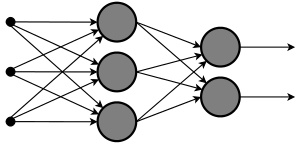

Activation function - maps the resulting values in between 0 to 1 or -1 to 1 etc

1. **Linear activation function**  - f(x)= x

It will not add any non linearity , and we can not learn progressively .thats why we need something which changes from 0 to 1(continuous function).



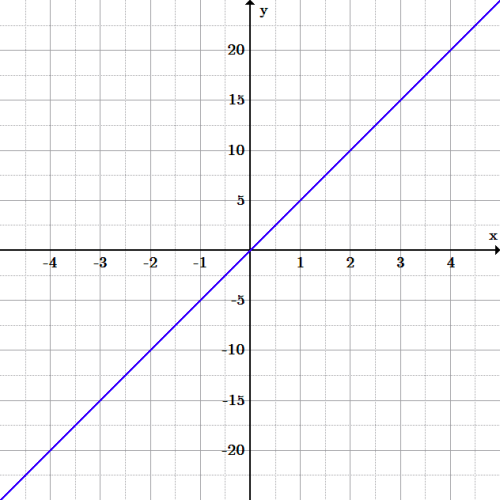

2. sigmoid - f(x)= 1/1+e^-x



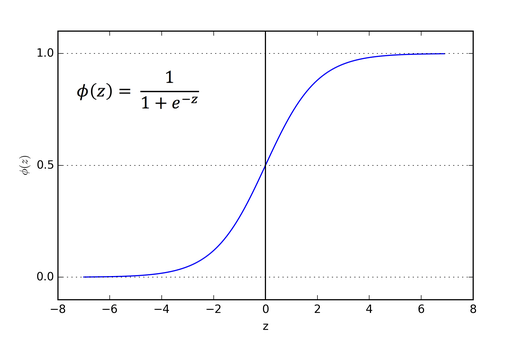

3. tanh 

tanh(𝑧) = (e^z - e^-z)/(e^z + e^-z)

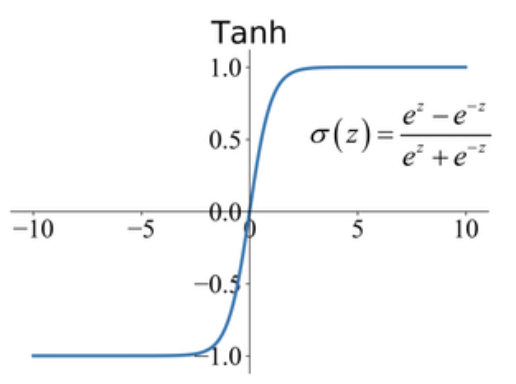

outputs range from -1 to 1

4. ReLU - REctified Linear Unit)

 f(x) = max(0, x)

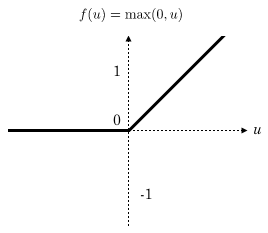

solves problems like vanishing gradients ( which occurs in sigmoid )

5. Softmax Activation Function

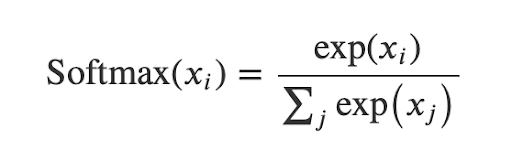



*   converts a vector of numbers into a vector of probabilities
*   used in output layers 




## Back -propagation 

1. Initially , all the weights have some random assignment
2. Then, the net is activated for each input in the training set: values are propagated forward from the input stage through the hidden stages to the output stage where a prediction is made
3. then propagate the error back using an appropriate optimizer algorithm such as gradient descent to adjust the neural network weights with the goal of reducing the error.


## Gradient descent 

A gradient measures how much the output of a function changes if you change the inputs a little bit.
Think of gradient descent as hiking down to the bottom of a valley. This is a better analogy because it is a minimization algorithm that minimizes a given function.

w = w - 𝛂 * ▽ f(w)

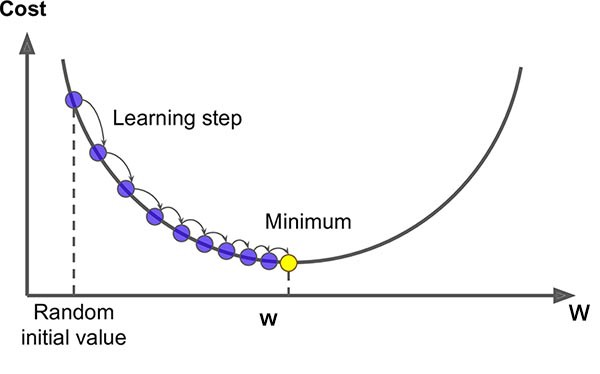

Stochastic gradient descent (SGD) - one by one 

Mini batch gradient descent - take batch of 10 or 20 or 100 or 200 etc 

## Recognizing hand written digits 

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Network and training.
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

# Loading MNIST dataset.
# Labels have one-hot representation.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs to be within in [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Labels have one-hot representation.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

# Build the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
          input_shape=(RESHAPED,),
          name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
          name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,
          name='dense_layer_3', activation='softmax'))

# Summary of the model.
model.summary()

# Compiling the model.
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model.
model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 1.5149 - accuracy: 0.6253 - val_loss: 0.7896 - val_accuracy: 0.8357
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.6142 - accuracy: 0.8513 - val_loss: 0.4628 - val_accuracy:

## Tensorflow 2.0 Features 

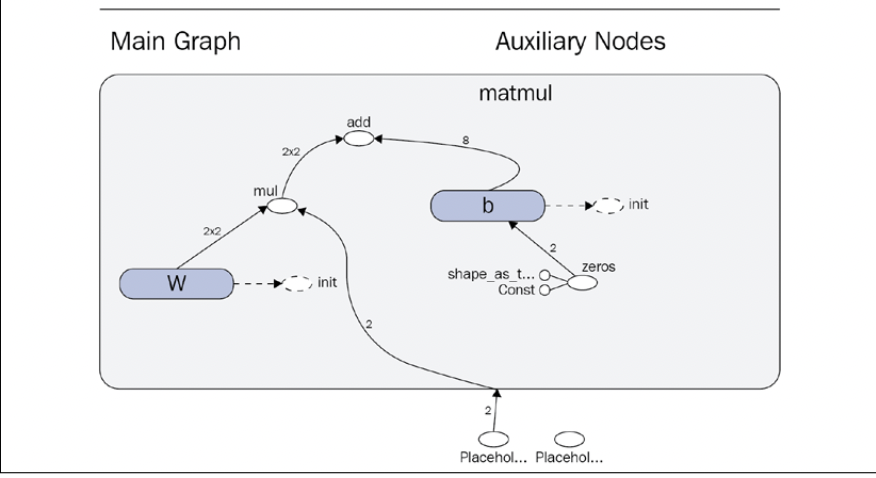

static computational graphs - In 1.0 
In 2.0 - you still have a graph, but you can define, change, and execute nodes on-the-fly, with no special session interfaces or placeholders. This is what is called **eager execution**, meaning that the model definitions are dynamic, and the execution is 





## Better performance with tf.function

**AutoGraph** takes eager-style Python code and automatically converts it to graph-generating code.

In [ ]:
import tensorflow as tf
def linear_layer(x):
  return 3 * x + 2
  
@tf.function
def simple_nn(x):
  return tf.nn.relu(linear_layer(x))
def simple_function(x):
        return 3 * x + 2


In [ ]:
import tensorflow as tf
import timeit
cell = tf.keras.layers.LSTMCell(100)

@tf.function
def fn(input, state):
    return cell(input, state)

input = tf.zeros([100, 100])
state = [tf.zeros([100, 100])] * 2
# warmup

graph_time = timeit.timeit(lambda: cell(input, state), number=100)
auto_graph_time = timeit.timeit(lambda: fn(input, state), number=100)
print('graph_time:', graph_time)
print('auto_graph_time:', auto_graph_time)

graph_time: 0.9453950399993118
auto_graph_time: 0.21063122199939244
